In [1]:
import pandas as pd

In [2]:
# products_with_categories.csv
path = "https://raw.githubusercontent.com/Tehnik762/Eniac_discounts/main/products_with_categories.csv"
products_df = pd.read_csv(path)
products_df = products_df.drop(columns=["Unnamed: 0"])

# orders_qu.csv
path = "https://raw.githubusercontent.com/Tehnik762/Eniac_discounts/main/orders_qu.csv"
orders_df = pd.read_csv(path)

# orderlines_df.csv
path = "https://raw.githubusercontent.com/Tehnik762/Eniac_discounts/main/orderlines_qu.csv"
orderlines_df = pd.read_csv(path)

# brands_cl.csv
path = "https://raw.githubusercontent.com/Tehnik762/Eniac_discounts/main/brands.csv"
brands = pd.read_csv(path)

## Preparing Discounts_DF

In [3]:
discounts_df = orderlines_df.merge(products_df, how="left", on="sku")[["sku", "unit_price", "price", "date", "id", "id_order", "product_quantity", "unit_price_total" ]]

In [4]:
discounts_df["discounts"] = discounts_df["price"] - discounts_df["unit_price"]

In [5]:
discounts_df["discounts"].describe()

count    82156.000000
mean        24.928848
std         45.363207
min       -785.050000
25%          5.000000
50%         14.720000
75%         30.000000
max       1320.000000
Name: discounts, dtype: float64

In [6]:
discounts_df


,sku,unit_price,price,date,id,id_order,product_quantity,unit_price_total,discounts
0,OWC0100,47.49,60.99,2017-01-01 01:46:16,1119116,299545,1,47.49,13.50
1,IOT0014,18.99,22.95,2017-01-01 01:50:34,1119119,299546,1,18.99,3.96
2,APP0700,72.19,89.00,2017-01-01 01:54:11,1119120,295347,1,72.19,16.81
3,BEA0065,256.49,299.95,2017-01-01 02:18:45,1119133,299555,1,256.49,43.46
4,CRU0039-A,60.90,76.99,2017-01-01 02:20:14,1119134,299556,1,60.90,16.09
...,...,...,...,...,...,...,...,...,...
82941,APP1922,161.00,179.00,2018-03-14 13:55:15,1650193,527394,1,161.00,18.00
82942,PAC0653,141.58,215.98,2018-03-14 13:55:44,1650195,527396,1,141.58,74.40
82943,LAC0227,249.99,299.99,2018-03-14 13:56:02,1650196,527384,1,249.99,50.00
82944,JBL0122,42.99,49.95,2018-03-14 13:56:38,1650198,527397,1,42.99,6.96


### Removing the outliers

In [7]:
q1 = discounts_df["discounts"].quantile(0.25)
q3 = discounts_df["discounts"].quantile(0.75)
iqr = q3-q1
discounts_df.shape

(82946, 9)

In [8]:
discounts_df = discounts_df.loc[(discounts_df["discounts"] > (q1 - 1.5*iqr)) & (discounts_df["discounts"] < (q3 + 1.5*iqr))]
discounts_df

,sku,unit_price,price,date,id,id_order,product_quantity,unit_price_total,discounts
0,OWC0100,47.49,60.99,2017-01-01 01:46:16,1119116,299545,1,47.49,13.50
1,IOT0014,18.99,22.95,2017-01-01 01:50:34,1119119,299546,1,18.99,3.96
2,APP0700,72.19,89.00,2017-01-01 01:54:11,1119120,295347,1,72.19,16.81
3,BEA0065,256.49,299.95,2017-01-01 02:18:45,1119133,299555,1,256.49,43.46
4,CRU0039-A,60.90,76.99,2017-01-01 02:20:14,1119134,299556,1,60.90,16.09
...,...,...,...,...,...,...,...,...,...
82940,OWC0035-2,71.89,87.98,2018-03-14 13:52:18,1650186,525853,1,71.89,16.09
82941,APP1922,161.00,179.00,2018-03-14 13:55:15,1650193,527394,1,161.00,18.00
82943,LAC0227,249.99,299.99,2018-03-14 13:56:02,1650196,527384,1,249.99,50.00
82944,JBL0122,42.99,49.95,2018-03-14 13:56:38,1650198,527397,1,42.99,6.96


In [9]:
orders_df = orders_df.loc[orders_df.order_id.isin(discounts_df['id_order'])]

In [10]:
orderlines_df = orderlines_df.loc[orderlines_df.id_order.isin(discounts_df['id_order'])]

Now we are ready to work with discounts!

In [11]:
discounts_df['disc_percent'] = round(discounts_df["discounts"]/discounts_df["price"]*100, 2)

/var/folders/hr/2msgqhwd1qv_p2chqg5f4gpw0000gn/T/ipykernel_70280/2652997234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discounts_df['disc_percent'] = round(discounts_df["discounts"]/discounts_df["price"]*100, 2)


In [12]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

Breaking date by days to plot it

In [13]:
discounts_df['date'] = pd.to_datetime(discounts_df['date'])

In [19]:
discounts_df["plotdate"] = discounts_df.date.dt.to_period('M').astype("str")


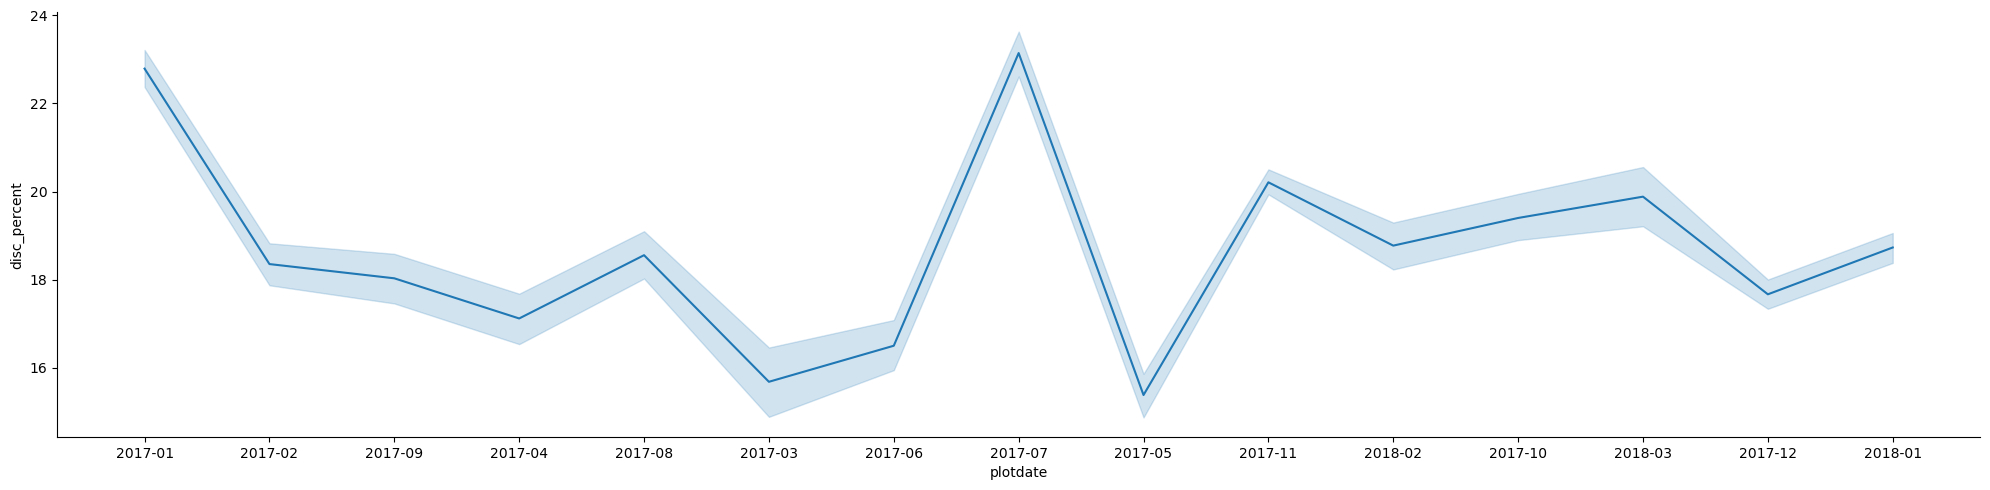

In [18]:
sns.relplot(kind="line", data=discounts_df, x="plotdate", y="disc_percent", aspect=4);

In [20]:
discounts_df.loc[discounts_df["disc_percent"] < -1].sort_values("disc_percent")

,sku,unit_price,price,date,id,id_order,product_quantity,unit_price_total,discounts,disc_percent,plotdate
16754,IFX0074,24.95,7.99,2017-04-22 12:20:43,1233154,347233,1,24.95,-16.96,-212.27,2017-04
32514,IFX0074,24.95,7.99,2017-08-11 09:29:25,1316185,388586,1,24.95,-16.96,-212.27,2017-08
29046,IFX0074,24.95,7.99,2017-07-20 12:27:58,1297936,379925,1,24.95,-16.96,-212.27,2017-07
47242,REP0314,69.99,44.99,2017-11-15 18:13:58,1408541,427265,1,69.99,-25.00,-55.57,2017-11
35766,REP0297,89.99,59.99,2017-09-07 10:47:51,1346840,397336,1,89.99,-30.00,-50.01,2017-09
...,...,...,...,...,...,...,...,...,...,...,...
36474,SAN0103,28.28,27.99,2017-09-13 17:45:48,1351746,399698,1,28.28,-0.29,-1.04,2017-09
15189,SAN0103,28.28,27.99,2017-03-31 09:24:10,1217639,341098,1,28.28,-0.29,-1.04,2017-03
57631,SAN0103,28.28,27.99,2017-12-03 14:02:30,1474522,454398,1,28.28,-0.29,-1.04,2017-12
58383,SAN0103,28.28,27.99,2017-12-07 16:56:26,1482061,457215,1,28.28,-0.29,-1.04,2017-12


Let's calc the most sold product

In [21]:
# head 5 products for testing in future
orderlines_df.groupby('sku').product_quantity.sum().sort_values(ascending=False).head(5).reset_index()

,sku,product_quantity
0,APP1190,1764
1,APP0698,1071
2,KIN0137,808
3,WDT0183,773
4,APP0927,709


In [22]:
# testing the idea of big revenue
# head 5 products for testing in future
orderlines_df.groupby('sku').unit_price_total.sum().sort_values(ascending=False).head(5).reset_index()

,sku,unit_price_total
0,APP2485,336358.00
1,APP2477,236317.63
2,APP2483,233145.69
3,LGE0044,190074.02
4,APP2479,160558.02


In [23]:
the_most_sold = orderlines_df.groupby('sku').unit_price_total.sum().sort_values(ascending=False).head(1).reset_index()["sku"][0]
the_most_sold

'APP2485'

In [24]:
# delete or comment this cell for real most sold
#the_most_sold = "LGE0044"

In [25]:
orderlines_df.loc[orderlines_df['sku'] == the_most_sold, "product_quantity"].sum()

376

In [26]:
the_most_sold_discounts = discounts_df.loc[discounts_df.sku == the_most_sold]
the_most_sold_discounts

,sku,unit_price,price,date,id,id_order,product_quantity,unit_price_total,discounts,disc_percent,plotdate
37717,APP2485,917.33,919.0,2017-09-22 18:35:42,1359186,403344,1,917.33,1.67,0.18,2017-09
37752,APP2485,917.33,919.0,2017-09-22 21:18:44,1359345,403423,1,917.33,1.67,0.18,2017-09
38038,APP2485,890.02,919.0,2017-09-25 04:52:26,1360923,404200,1,890.02,28.98,3.15,2017-09
38039,APP2485,899.00,919.0,2017-09-25 05:02:09,1360932,404199,1,899.00,20.00,2.18,2017-09
38084,APP2485,917.33,919.0,2017-09-25 12:27:46,1361168,404327,1,917.33,1.67,0.18,2017-09
...,...,...,...,...,...,...,...,...,...,...,...
81663,APP2485,899.00,919.0,2018-03-06 19:23:05,1638282,522266,2,1798.00,20.00,2.18,2018-03
82015,APP2485,899.00,919.0,2018-03-08 16:41:04,1640468,523372,1,899.00,20.00,2.18,2018-03
82343,APP2485,899.00,919.0,2018-03-10 17:31:13,1644804,524940,1,899.00,20.00,2.18,2018-03
82375,APP2485,899.00,919.0,2018-03-10 22:53:50,1645694,525246,1,899.00,20.00,2.18,2018-03


In [27]:
the_most_sold_discounts_plot = the_most_sold_discounts.groupby("plotdate").agg({"disc_percent":"mean", "product_quantity":"sum"})
the_most_sold_discounts_plot = the_most_sold_discounts_plot.drop(the_most_sold_discounts_plot.index[-1])
the_most_sold_discounts_plot

,disc_percent,product_quantity
plotdate,,
2017-09,0.849444,18
2017-10,0.706250,25
2017-11,2.920275,110
2017-12,2.374321,82
2018-01,3.111975,81
2018-02,2.180000,41


In [28]:
name = products_df.loc[products_df["sku"] == the_most_sold, "name"].values[0]
print(name)

Apple iPhone 8 Plus 64GB Gold


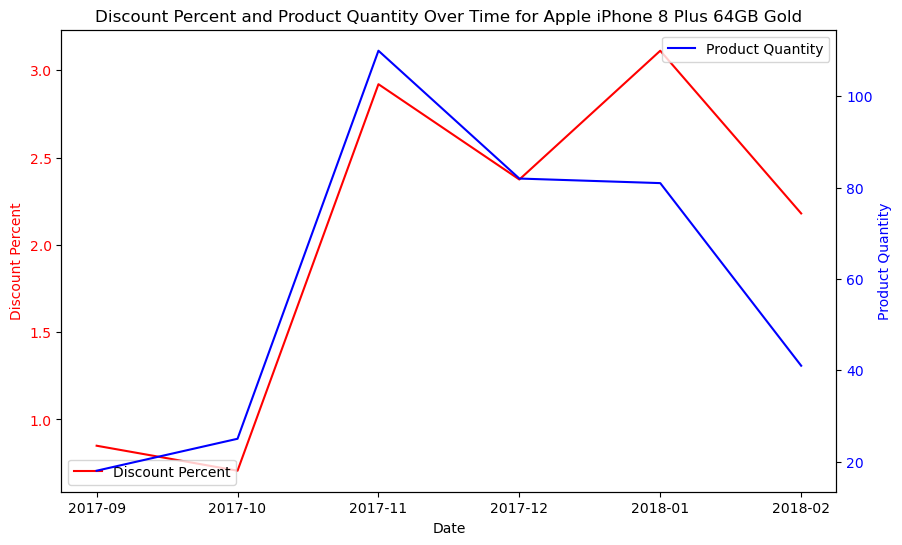

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 6))



sns.lineplot(data=the_most_sold_discounts_plot, x="plotdate", y="disc_percent", ax=ax1, label='Discount Percent', color='r')
ax1.set_xlabel('Date')
ax1.set_xlabel('Date')
ax1.set_ylabel('Discount Percent', color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()
sns.lineplot(data=the_most_sold_discounts_plot, x="plotdate", y="product_quantity", ax=ax2, label='Product Quantity', color='b')
ax2.set_ylabel('Product Quantity', color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax1.legend(loc='lower left')
ax2.legend(loc='upper right')

plt.title('Discount Percent and Product Quantity Over Time for '+name)


plt.show();

In [30]:
the_most_sold_discounts_plot = the_most_sold_discounts.groupby("plotdate").agg({"disc_percent":"mean", "unit_price_total":"sum"})
the_most_sold_discounts_plot = the_most_sold_discounts_plot.drop(the_most_sold_discounts_plot.index[-1])
the_most_sold_discounts_plot

,disc_percent,unit_price_total
plotdate,,
2017-09,0.849444,16401.31
2017-10,0.706250,22817.26
2017-11,2.920275,98146.05
2017-12,2.374321,73572.28
2018-01,3.111975,72120.02
2018-02,2.180000,36859.00


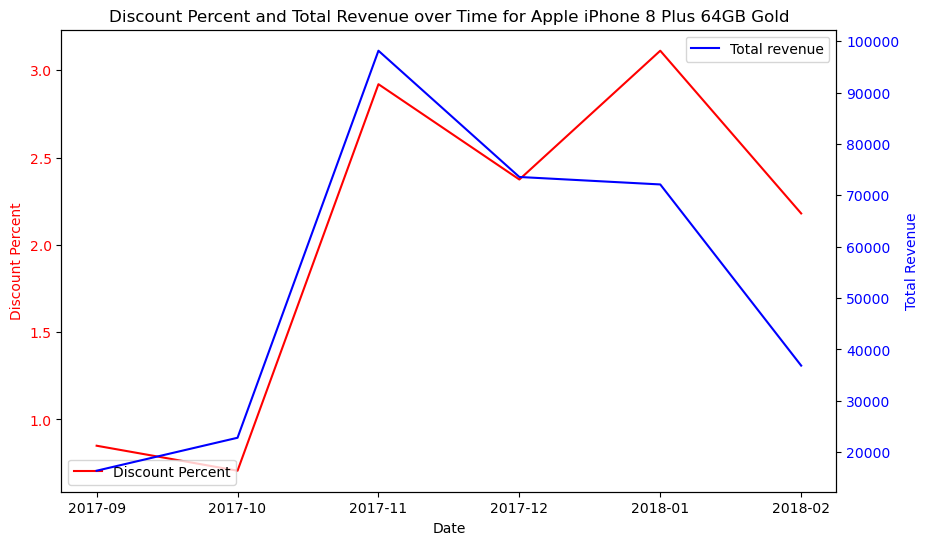

In [32]:
fig, ax1 = plt.subplots(figsize=(10, 6))



sns.lineplot(data=the_most_sold_discounts_plot, x="plotdate", y="disc_percent", ax=ax1, label='Discount Percent', color='r')
ax1.set_xlabel('Date')
ax1.set_xlabel('Date')
ax1.set_ylabel('Discount Percent', color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()
sns.lineplot(data=the_most_sold_discounts_plot, x="plotdate", y="unit_price_total", ax=ax2, label='Total revenue', color='b')
ax2.set_ylabel('Total Revenue', color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax1.legend(loc='lower left')
ax2.legend(loc='upper right')

plt.title('Discount Percent and Total Revenue over Time for '+name)


plt.show();

## Let's do the same for a 5 (10, 100??) top products

In [33]:
n_products = 200

In [34]:
big_share_products = orderlines_df.groupby('sku').unit_price_total.sum().sort_values(ascending=False).nlargest(n_products).reset_index()
big_share_products

,sku,unit_price_total
0,APP2485,336358.00
1,APP2477,236317.63
2,APP2483,233145.69
3,LGE0044,190074.02
4,APP2479,160558.02
...,...,...
195,LAC0214,10783.45
196,LAC0205,10737.71
197,APP0698,10707.99
198,OWC0153-2,10694.90


In [35]:
big_share_products_discounts = discounts_df.loc[discounts_df.sku.isin(big_share_products.sku)]


In [37]:
big_share_discounts_plot = big_share_products_discounts.groupby("plotdate").agg({"disc_percent":"mean", "product_quantity":"sum", "unit_price_total":"sum"})
big_share_discounts_plot = big_share_discounts_plot.drop(big_share_discounts_plot.index[-1])
big_share_discounts_plot

,disc_percent,product_quantity,unit_price_total
plotdate,,,
2017-01,23.545778,2064,282565.40
2017-02,14.983553,1038,175296.79
2017-03,12.651597,372,74777.80
2017-04,15.652894,827,151426.49
2017-05,11.912016,930,184370.00
2017-06,12.738851,866,199880.80
2017-07,17.339601,1697,376784.63
2017-08,13.662173,1184,249436.70
2017-09,11.882404,1398,388188.10


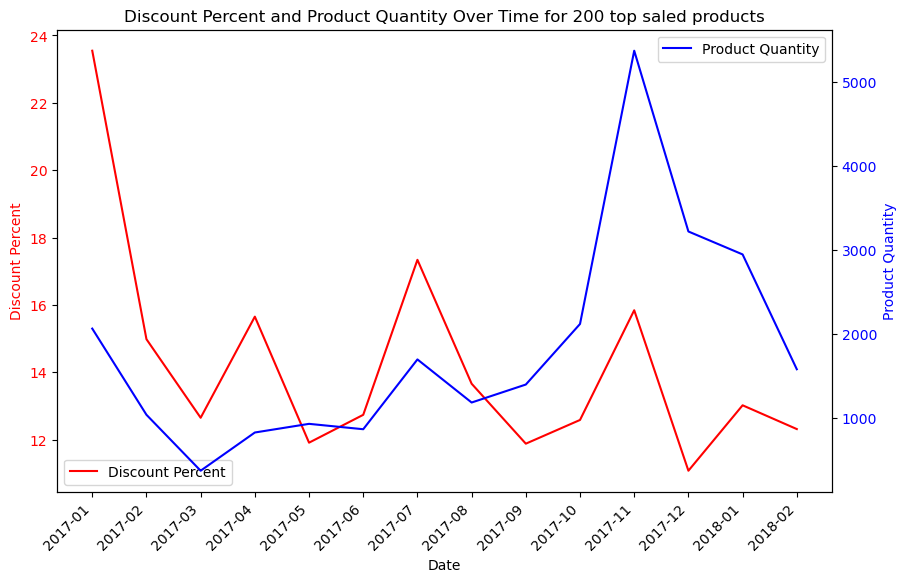

In [38]:
fig, ax1 = plt.subplots(figsize=(10, 6))



sns.lineplot(data=big_share_discounts_plot, x="plotdate", y="disc_percent", ax=ax1, label='Discount Percent', color='r')
ax1.set_xlabel('Date')

ax1.set_ylabel('Discount Percent', color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()
sns.lineplot(data=big_share_discounts_plot, x="plotdate", y="product_quantity", ax=ax2, label='Product Quantity', color='b')
ax2.set_ylabel('Product Quantity', color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax1.legend(loc='lower left')
ax2.legend(loc='upper right')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.title('Discount Percent and Product Quantity Over Time for '+str(n_products)+ " top saled products")


plt.show();

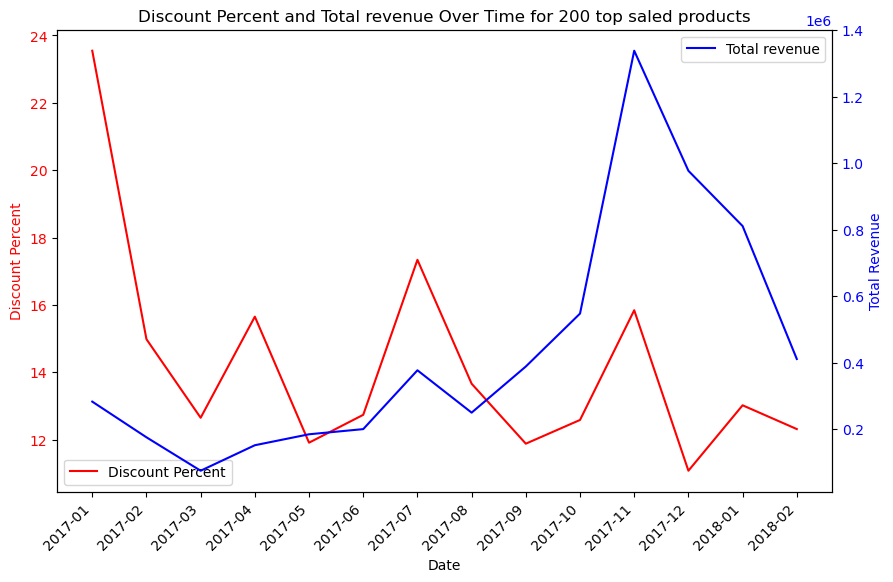

In [41]:
fig, ax1 = plt.subplots(figsize=(10, 6))



sns.lineplot(data=big_share_discounts_plot, x="plotdate", y="disc_percent", ax=ax1, label='Discount Percent', color='r')
ax1.set_xlabel('Date')

ax1.set_ylabel('Discount Percent', color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()
sns.lineplot(data=big_share_discounts_plot, x="plotdate", y="unit_price_total", ax=ax2, label='Total revenue', color='b')
ax2.set_ylabel('Total Revenue', color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax1.legend(loc='lower left')
ax2.legend(loc='upper right')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.title('Discount Percent and Total revenue Over Time for '+str(n_products)+ " top saled products")


plt.show();